# Logistic Regression (part 1)

In [62]:
# importing the required modules
import numpy as np 
import matplotlib.pyplot as plt


# to get matplot figures render correctly in the notebook use:
%matplotlib inline 

## Loading and Inspecting the Data

First, let's load the data.   
The datafile `ex2data1.txt` is a comma-separated file that contains data of 100 students on the score of two exams. The file contains three columns:
- column 1 yields the score of exam 1
- column 2 yields the score of exam 2
- column 3 yields a 0 or 1 indicating if the student is rejected (0) or accepted (1) for a certain program

**The goal is to predict if a student is rejected or accepted for the program given the scores of the two exams.**

Use the code snippet below to load the data into a 2D numpy array `data`:

In [63]:
FILENAME = 'data/ex2data1.txt'  # points to the datafolder; either a relative or absolute path
DELIMITER = ','  # we use a lot of csv or txt files where the data is separated by a comma

data = np.loadtxt(FILENAME, delimiter=DELIMITER)

Inspect the data by e.g. printing the shape of `data` and the first couple of rows

In [64]:
# check the shape of data by printing the nr.rows and nr.columns

'''YOUR CODE GOES HERE '''
print(data.shape)

# print the first and last couple of rows

'''YOUR CODE GOES HERE '''
print(data[:5])
print(data[-5:])

(100, 3)
[[34.62365962 78.02469282  0.        ]
 [30.28671077 43.89499752  0.        ]
 [35.84740877 72.90219803  0.        ]
 [60.18259939 86.3085521   1.        ]
 [79.03273605 75.34437644  1.        ]]
[[83.48916274 48.3802858   1.        ]
 [42.26170081 87.10385094  1.        ]
 [99.31500881 68.77540947  1.        ]
 [55.34001756 64.93193801  1.        ]
 [74.775893   89.5298129   1.        ]]


To get an even better idea of the data, make a plot. 

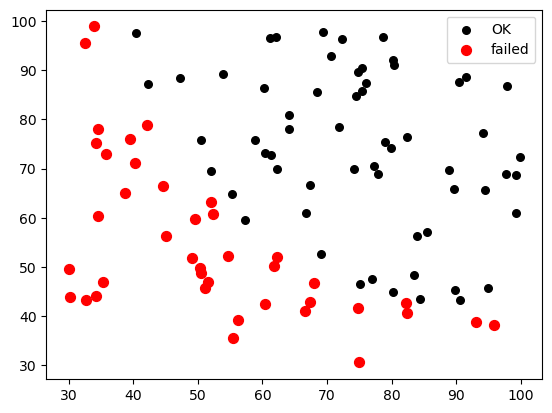

In [65]:
# create a plot of the data
# make a scatter plot the score of exam 1 on the x-axis and that of exam 2 on the y-axis
# plot a black marker for accepted and a red marker for rejected students

x = data[:, 0]
y = data[:, 1]
mask = data[:,2]==1

plt.scatter(*data[mask,:2].T, s=30, c = 'k', marker = 'o', label='OK')
plt.scatter(*data[~mask,:2].T, s=50, c = 'r', marker = 'o', label='failed')

plt.legend()




## Defining the model

The logistic regression model is given by (lecture notes eq. 3.4):
$$  \mathbf{h}_{\theta} (\mathbf{X})  = \sigma (\mathbf{X} \boldsymbol{\theta})$$ 
with $\mathbf{X}$ the feature matrix , $\mathbf{h}$ the prediction (as a value between 0 and 1), $\boldsymbol{\theta}$ the weight vector and the function $\sigma()$ the logistic function given by:
$$ \sigma (z) = \frac{1}{1 + e^{-z}}   $$

The weight vector is found by minimizing the *loss* $L$. The loss in this case is given by (lecture notes eq. 3.9):
$$  L = - \frac{1}{M} \left ( \mathbf{y}^T \ln \left [ \sigma \left ( \mathbf{X}\boldsymbol{\theta} \right ) \right ] + \left ( \mathbf{1} - \mathbf{y} \right )^T  \ln \left [\mathbf{1} - \sigma \left ( \mathbf{X}\boldsymbol{\theta} \right ) \right ]  \right ) $$


#### Create the feature matrix and label vector

The feature matrix is represented by a 2D numpy array `X` composed of a column filled with ones (the bias) and column(s) with the feature(s). Also we need to define the label vector y as a 2D numpy array `y`.

In [66]:
# define the feature matrix
'''YOUR CODE GOES HERE '''
M =data.shape[0]
X = np.column_stack((np.ones(M),data[:,0],data[:,1]))


# define the label vector
'''YOUR CODE GOES HERE '''
y = data[:, 2].reshape(-1, 1)


# inspect the feature matrix
'''YOUR CODE GOES HERE '''
print(X.shape)
# print(X)


(100, 3)


Since we will need the logistic function let's implement a function for that.

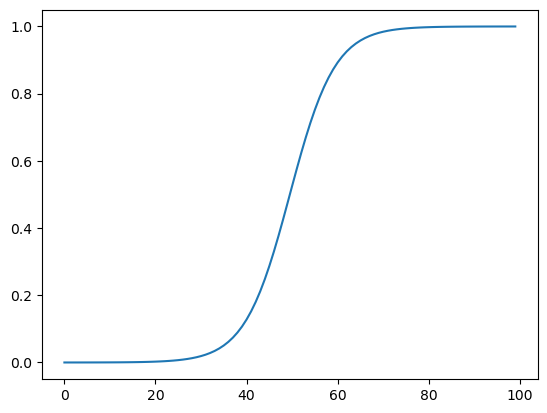

In [67]:
def sigmoid(z):
    """
    returns the sigmoid function of z

    Parameters
    ----------
    z : float or ndarray

    Returns
    -------
    1 / (1 + exp(-z)) : same type and shape as z

    """
   
    '''YOUR CODE GOES HERE '''
    
    return  1 / (1 + np.exp(-z))

plt.plot(sigmoid(np.linspace(-10,10,100)))


#### Implement the loss function
Next, define a function that computes the loss given the feature matrix, the label vector and the weight vector.

function | description
----|----
`compute_loss(X, y, theta)` | This function takes the feature matrix `X`, label vector `y` and the weight vector `theta` and returns the loss

In [68]:
def compute_loss(X, y, theta):
    """
    Computes the loss (or cost)

    Parameters
    ----------
    X : ndarray of shape (M, N+1)
        feature matrix.
    y : ndarray of shape (M, 1)
        label vector.
    theta : ndarray of shape (N+1, 1)
        weights vector.        

    Returns
    -------
    Loss : float

    """
    
    '''YOUR CODE GOES HERE '''
   
    M=len(X)
    z= X@theta

    sigmoid1 = np.log(sigmoid(z))

#     y2 = np.transpose(np.ones(M)-y)
   
    sigmoid2 = np.log(1- sigmoid(z))
    loss=-1/ M *(y.T@ sigmoid1 + (1-y).T @ sigmoid2)
#     print(loss)
    loss=loss[0,0]
    if np.isnan(loss):
        loss=np.inf
    
    return loss

In [69]:
# test the function with some value for theta
theta = np.array([0.,0.,0.]).reshape(-1,1)
#print(X@theta)
#print(theta)
loss = compute_loss(X,y,theta )
print(loss)

0.6931471805599452


## Train the Model

The next step is to train the model. We use the gradient descent algortihm for this. The weight vector is updated according to:
$$  \boldsymbol{\theta} \rightarrow \boldsymbol{\theta} - \eta \frac{\mathrm{d} L}{\mathrm{d} \boldsymbol{\theta}} $$
where $\eta$ is a *hyperparameter* that allows to tune the rate of descent, and the gradient defined as (lecture notes eq. 3.10):

$$  \frac{\mathrm{d} L}{\mathrm{d} \boldsymbol{\theta}}  = \frac{1}{M} \mathbf{X}^T  \left ( \sigma \left ( \mathbf{X}  \boldsymbol{\theta} \right ) - \textbf y \right ) $$

Therefore we need to implement the following functions:

function | description
--------|----
`gradient(X, y, theta)` | This function takes the feature matrix `X`, label vector `y` and the weight vector `theta` and returns the gradient of the loss w.r.t. the weight(s)
`train(X, y, theta, eta, num_iters)` | This function takes the feature matrix `X`, label vector `y`, the weight vector `theta`, hyperparameter `eta` and the number of iteration steps `num_iters`, and returns the weight vector the minimises the loss.

In [70]:
def gradient(X, y, theta):
    """
    Computes the gradient vector

    Parameters
    ----------
    X : ndarray of shape (M, N+1)
        feature matrix.
    y : ndarray of shape (M, 1)
        label vector.
    theta : ndarray of shape (N+1, 1)
        weights vector.        

    Returns
    -------
    grad : ndarray of shape (N+1, 1)
        the gradient

    """
    
    '''YOUR CODE GOES HERE '''
    M = len(X)
    grad = 1/M* X.T@ (sigmoid(X@theta)-y)
    
    return grad

In [71]:
def train(X, y, theta, eta = 0.001, num_iters = 5500):
    """
    Implements the gradient descent algorithm for a linear regression model

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column
    y : (M x 1) ndarray
        label vector
    theta : (N+1 x 1) ndarray
        The weight vector inlcuding the bias
    eta : float, optional
        The rate. The default is 0.01.
    num_iters : int, optional
        Number of iterations that is performed. The default is 5500.

    Returns
    -------
    theta : (N+1 x 1) ndarray
        The optimised weight vector    
    loss : (num_iters,) ndarray
        The loss at each iteration
    """
    
    '''YOUR CODE GOES HERE '''
    loss=[]
    theta1=[]
    for i in range(0,num_iters):
        theta= theta- eta*gradient(X,y,theta)
        oneLoss = compute_loss(X, y, theta)
        loss.append(oneLoss)
        #theta1.append(theta)
    


    return (theta, loss)

In [74]:
# intialize theta to some value
theta = np.array([0.,0.,0.]).reshape(-1,1)


# train the model
theta, loss = train(X,y,theta,0.001,1000000)

# print the computed weight vector
print(f'weigths: {theta}')

weigths: [[-15.39517866]
 [  0.12825989]
 [  0.12247929]]


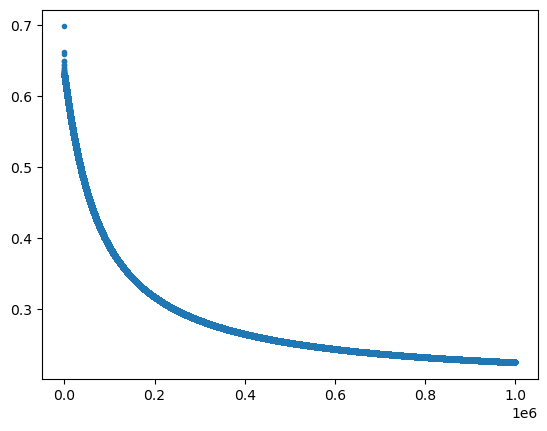

In [75]:
# create a plot of the loss versus the interation number

'''YOUR CODE GOES HERE '''
x= [i for i in range(len(loss))]
plt.scatter(x,loss, marker='.')

## Evaluate the model

To evaluate the model, we need a function `predict(X, theta, threshold=0.5)` that predicts the label `y` given some new values of the features `X` and a `threshold` value that determines the decision boundary (defaults to 0.5). Implement this function below.

In [40]:
def predict(X, theta, threshold = 0.5):
    """
    Predicts the label y given features X for a logistic regression model with weights theta

    Parameters
    ----------
    X : (M x N+1) ndarray (with M the number of samples and N the number of features excluding the bias)
        The feature matrix including the bias in the first column 
    theta : (N+1 x 1) ndarray
        The weight vector inlcuding the bias
    threshold : float (default=0.5)
        the threshold value of the decision boundary

    Returns
    -------
    y_pred : (M x 1) ndarray
        The predicted labels (either 0 or 1)    
    """  
    
    '''YOUR CODE GOES HERE '''
    M=len(X)
    y_pred=[]
    z= X@theta 
    
#     plt.plot(sigmoid(z))
#     print(sigmoid(z))
    for i in range(0,M):
        if(sigmoid(z)[i]>=threshold):
            y_pred.append(1)
        else:
            y_pred.append(0)
    
    return y_pred


To see how wel the model predicts the correct label compute the percentage of correct predictions.

89.0


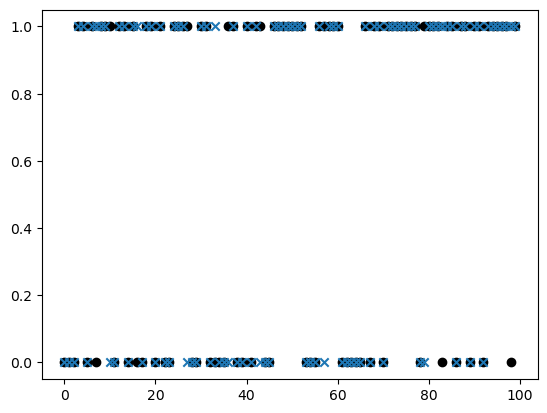

In [41]:
# compute how many % of the predictions are correct with your current model

'''YOUR CODE GOES HERE '''
y_predict = predict(X,theta)

y=data[:,2].reshape(-1,1)
x= [i for i in range(M)]
plt.scatter(x,y_predict,marker="o",c="k")
plt.scatter(x,y,marker="x")
count=0
for i in range(M):
    if(y_predict[i]==y[i]):
        count+=1;
print(count/M*100)


Obviously you can make a prediction of a new student that has a score of 45 for exam 1 and a score of 85 for exam 2. Compute below the prediction of the model for this student.

In [42]:
# Student with Exam 1 score 45 and Exam 2 score 85: will he pass?

'''YOUR CODE GOES HERE '''
print(predict([[1,45,85]], theta) )


[1]


Finally, you can plot the data together with the decision boundary (similar to figure 3.3. of the reader). 

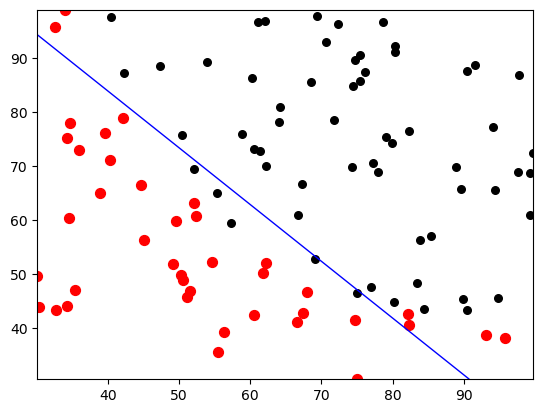

In [43]:
# make a plot of the data 

'''YOUR CODE GOES HERE '''
x = data[:, 0]
y = data[:, 1]
mask = data[:,2]==1

plt.scatter(*data[mask,:2].T, s=30, c = 'k', marker = 'o', label='OK')
plt.scatter(*data[~mask,:2].T, s=50, c = 'r', marker = 'o', label='failed')


# the code below plots the decision boundary in the plot.

# build mesh of gridpoints
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

# compute hypothesis on the meshgrid 
# first create a Mx2 ndarray with the values of the scores on the mesh 
data_mesh = np.column_stack((xx1.ravel(), xx2.ravel()))
# compute the full feature matrix
bias = np.ones(len(data_mesh)).reshape(-1,1)
X_mesh = np.column_stack((bias, data_mesh))

h = sigmoid(X_mesh @ theta)
h = h.reshape(xx1.shape)

# plot the contour level(s)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

# Logistic Regression (part 2)

In part 1 you had a look at a dataset that could be classified reasonibly well using only two features (excluding the bias): exam score 1 and exam score 2. This is however not always possible. In this notebook you will explore an example that requires the addition of more features.

## Loading and Inspecting the Data

First, let's load the data.   
The datafile `ex2data2.txt` is a comma-separated file that contains data on microchip tests. The file contains three columns:
- column 1 yields the score of test 1
- column 2 yields the score of test 2
- column 3 yields a 0 or 1 indicating if the chip failed (0) or if the chip was OK (1) 

**The goal is to predict if a chip failed or if the chip is OK given the scores on the two tests.**

Use the code snippet below to load the data into a 2D numpy array `data`:

In [44]:
FILENAME = 'data/ex2data2.txt'  # points to the datafolder; either a relative or absolute path
DELIMITER = ','  # we use a lot of csv or txt files where the data is separated by a comma

data = np.loadtxt(FILENAME, delimiter=DELIMITER)

Inspect the data by e.g. printing the shape of `data` and the first couple of rows

In [45]:
# check the shape of data by printing the nr.rows and nr.columns

'''YOUR CODE GOES HERE '''
print(data.shape)

(118, 3)


To get an even better idea of the data, make a plot. 

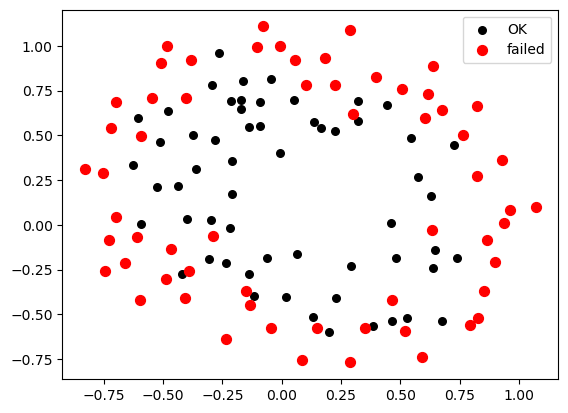

In [46]:
# create a plot of the data
# make a scatter plot the score of exam 1 on the x-axis and that of exam 2 on the y-axis
# plot a black marker for accepted and a red marker for rejected students


'''YOUR CODE GOES HERE '''
x = data[:, 0]
y = data[:, 1]
mask = data[:,2]==1

plt.scatter(*data[mask,:2].T, s=30, c = 'k', marker = 'o', label='OK')
plt.scatter(*data[~mask,:2].T, s=50, c = 'r', marker = 'o', label='failed')


plt.legend()

## Defining the model

Except for the feature matrix, the model is identical to the one used in part 1. Therefore we only need to change that part.

#### Create the feature matrix and label vector

The feature matrix is represented by a 2D numpy array `X` composed of a column filled with ones (the bias) and column(s) with the feature(s). 

In this example you will use polynomial features created from the data. We have two original features (test score 1 and test score 2). If we call them $x_1$ and $x_2$ then we can make features like:
$$ x_1, x_2, x_1^2, x_1x_2, x_2^2, x_1^3, .. \text{ etc} $$

To do this efficiently, you can make use of the `PolynomialFeatures` class of the `sklearn` package. Look up how this works in the documentation and create the feature matrix `X`. Use features upto a polynomial degree of at least 2.

See https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html for docs.

In [52]:
# import the PolynomialFeatures class
from sklearn.preprocessing import PolynomialFeatures

# define the feature matrix up to a polynomial degree of at least 2
'''YOUR CODE GOES HERE '''
M=len(data)

poly = PolynomialFeatures(2)
X = poly.fit_transform(data[:,0:2])
print(X.shape)
# define the label vector
'''YOUR CODE GOES HERE '''
y = data[:, 2].reshape(-1, 1)




(118, 6)


## Train the Model

In [54]:
# intialize theta to some value
theta = np.array([0.,0.,0.,0,0,0]).reshape(-1,1)


# train the model
'''YOUR CODE GOES HERE '''
theta, loss = train(X,y,theta,0.001,1000000)


# print the computed weight vector
'''YOUR CODE GOES HERE '''
print(f'weigths: {theta}')
# print(theta)

weigths: [[ 3.86038376]
 [ 2.22604687]
 [ 2.94760951]
 [-8.95932878]
 [-5.02147124]
 [-8.59366206]]


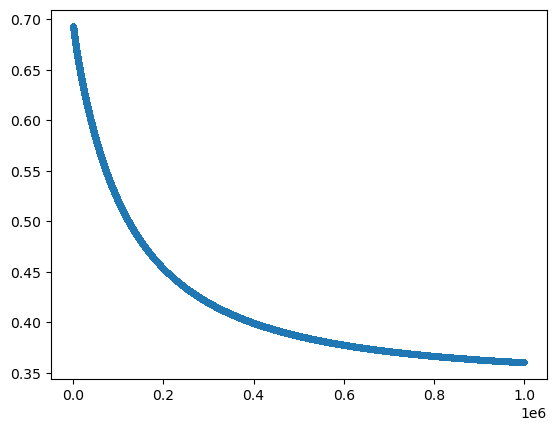

In [56]:
# create a plot of the loss versus the interation number

'''YOUR CODE GOES HERE '''
x= [i for i in range(len(loss))]
plt.scatter(x,loss, marker='.')

## Evaluate the model

To see how wel the model predicts the correct label compute the percentage of correct predictions.

In [57]:
# compute how many % of the predictions are correct with your current model

'''YOUR CODE GOES HERE '''
y_predict = predict(X,theta)

y=data[:,2].reshape(-1,1)
x= [i for i in range(M)]
# plt.scatter(x,y_predict,marker="o",c="k")
# plt.scatter(x,y,marker="x")
count=0
for i in range(M):
    if(y_predict[i]==y[i]):
        count+=1;
print(count/M*100)



83.89830508474576


Finally, you can plot the data together with the decision boundary (similar to figure 3.3. of the reader). 

(2500, 6)
(6, 1)


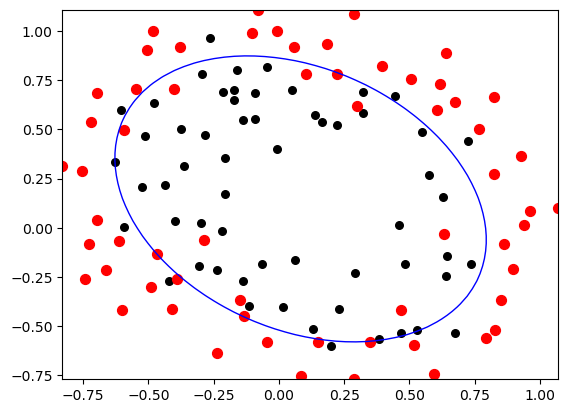

In [58]:
# make a plot of the data 

'''YOUR CODE GOES HERE '''
# x = data[:, 0]
y = data[:, 2]
mask = data[:,2]==1



plt.scatter(*data[mask,:2].T, s=30, c = 'k', marker = 'o', label='OK')
plt.scatter(*data[~mask,:2].T, s=50, c = 'r', marker = 'o', label='failed')


# the code below plots the decision boundary in the plot.

# build mesh of gridpoints
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

# compute hypothesis on the meshgrid 
# first create a Mx2 ndarray with the values of the scores on the mesh 
data_mesh = np.column_stack((xx1.ravel(), xx2.ravel()))
# compute the full feature matrix
bias = np.ones(len(data_mesh)).reshape(-1,1)
X_mesh = poly.fit_transform(data_mesh)


print(X_mesh.shape)
print(theta.shape)

h = sigmoid(X_mesh @ theta)
h = h.reshape(xx1.shape)

# plot the contour level(s)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

# Logistic Regression (part 3)

Finally, use sklearn to perform logistic regression of the chip data

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
# create the model
# to compare to your own results, do not use regularisation!
log_model = LogisticRegression(fit_intercept=False,penalty=None)
# fit the model
'''YOUR CODE GOES HERE '''

log_model.fit(X, y.ravel())


# print the weights
'''YOUR CODE GOES HERE '''
log_model.coef_



array([[  5.1693986 ,   3.24746061,   4.16625911, -12.026941  ,
         -7.531279  , -11.82252563]])

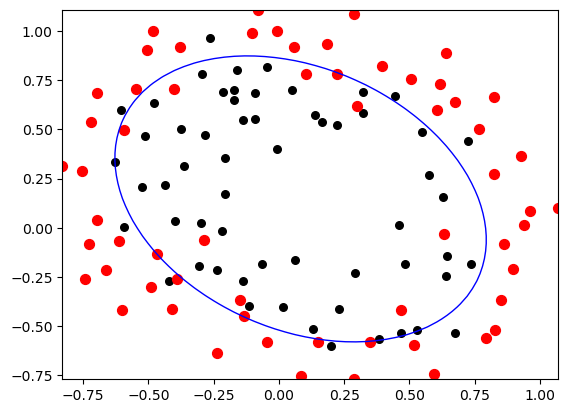

In [61]:
# plot the results
'''YOUR CODE GOES HERE '''
y = data[:, 2]
mask = data[:,2]==1



plt.scatter(*data[mask,:2].T, s=30, c = 'k', marker = 'o', label='OK')
plt.scatter(*data[~mask,:2].T, s=50, c = 'r', marker = 'o', label='failed')


# the code below plots the decision boundary in the plot.

# build mesh of gridpoints
x1_min, x1_max = X[:,1].min(), X[:,1].max()
x2_min, x2_max = X[:,2].min(), X[:,2].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

# compute hypothesis on the meshgrid 
# first create a Mx2 ndarray with the values of the scores on the mesh 
data_mesh = np.column_stack((xx1.ravel(), xx2.ravel()))
# compute the full feature matrix
# X_mesh = '''YOUR CODE GOES HERE '''
bias = np.ones(len(data_mesh)).reshape(-1,1)
X_mesh = poly.fit_transform(data_mesh)



h = sigmoid(X_mesh @ theta)
h = h.reshape(xx1.shape)



# plot the contour level(s)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')